In [36]:
import pandas as pd
import numpy as np
from scipy import stats

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


In [38]:
df = pd.read_excel("complete_site_info.xlsx")

In [44]:
df.describe()

,Israelis_Count,Tourists_Count,Total,pm10,pm2.5,nox,so2,Temperature,is_HeatWave,Tel_Aviv-Yafo_pm10,...,Qiryat Shemona_nox,Safed_nox,Tel_Aviv-Yafo_so2,Jerusalem_so2,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,Eilat_so2,Qiryat Shemona_so2,Safed_so2
count,109108.000000,109108.000000,109108.000000,55193.000000,47047.000000,107692.000000,88438.000000,109108.000000,109108.000000,109108.000000,...,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000,109108.000000
mean,339.423205,116.113631,455.536835,88.157325,29.590191,92.140786,2.712166,27.332355,0.397129,150.855654,...,12.747576,13.016442,8.824239,1.785474,14.943398,4.819869,3.841344,3.269771,2.613034,2.632804
std,1374.031000,345.011100,1457.485899,127.911949,27.438694,252.464101,2.531582,7.689675,0.489305,123.305732,...,8.504017,9.144850,3.419014,1.829629,13.594393,4.103867,1.841737,2.412507,2.246909,2.248942
min,0.000000,0.000000,0.000000,1.500000,0.100000,0.000000,0.000000,1.300000,0.000000,9.000000,...,1.000000,1.000000,2.500000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
25%,31.000000,0.000000,53.000000,27.900000,13.900000,7.000000,0.800000,21.100000,0.000000,91.400000,...,6.800000,6.800000,6.400000,0.350000,5.700000,1.700000,2.500000,2.000000,0.800000,0.800000
50%,107.000000,3.000000,159.500000,39.400000,19.900000,11.800000,2.300000,28.400000,0.000000,121.400000,...,10.400000,10.400000,7.900000,1.020000,10.500000,3.300000,3.600000,3.100000,2.100000,2.100000
75%,343.000000,57.000000,458.000000,82.300000,35.900000,25.000000,3.900000,33.300000,1.000000,167.900000,...,16.300000,16.500000,10.700000,2.700000,18.800000,7.300000,4.900000,4.000000,3.900000,3.900000
max,110020.000000,9054.000000,110020.000000,2600.300000,580.000000,2139.000000,53.000000,48.900000,1.000000,1847.300000,...,84.700000,84.700000,29.200000,14.600000,97.400000,19.800000,18.000000,31.500000,18.300000,18.300000


In [40]:
df.head()

,Model_number,Date,Site_Name,Israelis_Count,Tourists_Count,Total,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,...,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,Eilat_so2,Qiryat Shemona_so2,Safed_so2,region_Central,region_Judea_Samaria,region_North,region_South
0,2,2016-01-01,En Prat,20,0,20,1,0,0,0,...,2.6,1.2,0.9,3.7,0.6,0.6,0,1,0,0
1,6,2016-01-01,Apollonia,16,0,16,1,0,0,0,...,2.6,1.2,0.9,3.7,0.6,0.6,1,0,0,0
2,2,2016-01-01,En Afek,5,0,5,1,0,0,0,...,2.6,1.2,0.9,3.7,0.6,0.6,0,0,1,0
3,5,2016-01-01,Hai Ramon,31,2,33,1,0,0,0,...,2.6,1.2,0.9,3.7,0.6,0.6,0,0,0,1
4,7,2016-01-01,Hay-Bar Yotvata,109,2,111,1,0,0,0,...,2.6,1.2,0.9,3.7,0.6,0.6,0,0,0,1


In [41]:
list_cols= ['Date', 'Site_Name', 'Israelis_Count', 'Tourists_Count', 'Total','pm10',
       'pm2.5', 'nox', 'so2', 'Temperature', 'is_HeatWave',
       'Tel_Aviv-Yafo_pm10', 'Jerusalem_pm10', 'Haifa_pm10', 'Ashkelon_pm10',
       'Beer-Sheva_pm10', 'Eilat_pm10', 'Qiryat Shemona_pm10', 'Safed_pm10',
       'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5', 'Haifa_pm2.5',
       'Ashkelon_pm2.5', 'Beer-Sheva_pm2.5', 'Eilat_pm2.5',
       'Qiryat Shemona_pm2.5', 'Safed_pm2.5', 'Tel_Aviv-Yafo_nox',
       'Jerusalem_nox', 'Haifa_nox', 'Ashkelon_nox', 'Beer-Sheva_nox',
       'Eilat_nox', 'Qiryat Shemona_nox', 'Safed_nox', 'Tel_Aviv-Yafo_so2',
       'Jerusalem_so2', 'Haifa_so2', 'Ashkelon_so2', 'Beer-Sheva_so2',
       'Eilat_so2', 'Qiryat Shemona_so2', 'Safed_so2']

In [42]:
df = df[list_cols]
df

,Date,Site_Name,Israelis_Count,Tourists_Count,Total,pm10,pm2.5,nox,so2,Temperature,...,Qiryat Shemona_nox,Safed_nox,Tel_Aviv-Yafo_so2,Jerusalem_so2,Haifa_so2,Ashkelon_so2,Beer-Sheva_so2,Eilat_so2,Qiryat Shemona_so2,Safed_so2
0,2016-01-01,En Prat,20,0,20,31.3,4.0,2.5,0.0,10.5,...,6.2,6.2,7.2,0.1,2.6,1.2,0.9,3.7,0.6,0.6
1,2016-01-01,Apollonia,16,0,16,NaN,NaN,1.7,0.1,9.5,...,6.2,6.2,7.2,0.1,2.6,1.2,0.9,3.7,0.6,0.6
2,2016-01-01,En Afek,5,0,5,NaN,NaN,1.7,0.1,11.4,...,6.2,6.2,7.2,0.1,2.6,1.2,0.9,3.7,0.6,0.6
3,2016-01-01,Hai Ramon,31,2,33,NaN,NaN,1.7,0.1,9.5,...,6.2,6.2,7.2,0.1,2.6,1.2,0.9,3.7,0.6,0.6
4,2016-01-01,Hay-Bar Yotvata,109,2,111,NaN,NaN,1.7,0.1,11.4,...,6.2,6.2,7.2,0.1,2.6,1.2,0.9,3.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109103,2021-08-11,Eilat Coral Beach,789,0,789,367.8,78.6,794.7,NaN,35.2,...,14.4,14.4,17.7,2.4,27.1,5.1,5.3,5.3,6.2,6.2
109104,2021-08-11,Good Samaritan Museum,2,0,2,367.8,78.6,794.7,NaN,30.5,...,14.4,14.4,17.7,2.4,27.1,5.1,5.3,5.3,6.2,6.2
109105,2021-08-11,Hula,71,0,71,367.8,78.6,794.7,NaN,35.2,...,14.4,14.4,17.7,2.4,27.1,5.1,5.3,5.3,6.2,6.2
109106,2021-08-11,Khan Be’erot,6,0,6,367.8,78.6,794.7,NaN,30.5,...,14.4,14.4,17.7,2.4,27.1,5.1,5.3,5.3,6.2,6.2


התפלגות הביקורים לפי ימים:

<AxesSubplot:ylabel='Frequency'>

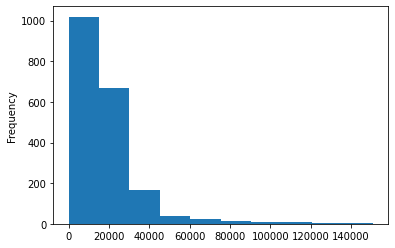

In [59]:
israelis = df.pivot_table(index="Date",values=["Israelis_Count"],aggfunc='sum')
israelis['Israelis_Count'].plot.hist()


In [57]:
import scipy.stats as stats
from scipy.stats import f

#perform Chi-Square Goodness of Fit Test
stats.f(f_obs=israelis['Israelis_Count'])
